In [1]:
Data: MNISt data set of handwritten digits
Subjective: try to correctly predict what number is written down base
solely on the image data in the form of an array

/home/michael/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [ ]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist=input_data.read_data_sets("/tmp/data", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [8]:
type(mnist.train.images)

numpy.ndarray

In [34]:
mnist.train.images.shape

(55000, 784)

In [35]:
mnist.train.num_examples

55000

In [12]:
mnist.train.images[2]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [13]:
mnist.train.images[2].reshape(28,28)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [56]:
sample=mnist.train.images[2].reshape(28,28)

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

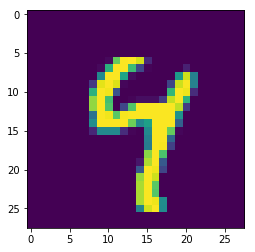

In [57]:
plt.imshow(sample)

In [26]:

Will try to make a deep learning or multi-layer perceptron network, 
that will be able to just taken the pixel information and classify it 
whatever number it represents



SyntaxError: invalid syntax (<ipython-input-26-13b78e649284>, line 1)

In [53]:
# it is very hard to know what good parameter values are on a 
# unfamiliar data set
# For MINST, they are:
learning_rate=0.001 # how quickly to adjust the fost function
training_epochs=15 # 15 training cycles to go through
batch_size=100 # size of the "batches" of training data

# network parameters
n_classes=10 # 10 possible outputs 0-9
n_samples=mnist.train.num_examples
n_input=784 # because 28x28 see above
# use only 2 hidden layers
n_hidden_1=256 # number of neurons 256 is a common units 
n_hidden_2=256

In [54]:
weights={
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [41]:
weights

{'h1': <tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>}

In [55]:
biases={
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [44]:
biases

{'h1': <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>}

In [71]:
x=tf.placeholder("float",[None, n_input])
y=tf.placeholder("float",[None, n_classes])

In [46]:
x

<tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>

In [47]:
y

<tf.Tensor 'Placeholder_1:0' shape=(?, 10) dtype=float32>

In [72]:
def multilayer_perceptron(x, weights, biases):
    layer_1=tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1=tf.nn.relu(layer_1)
    
    layer_2=tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2=tf.nn.relu(layer_2)
    
    out_layer=tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [81]:
pred=multilayer_perceptron(x,weights,biases)

In [84]:
cost =tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [130]:
xsamp,ysamp=mnist.train.next_batch(1)

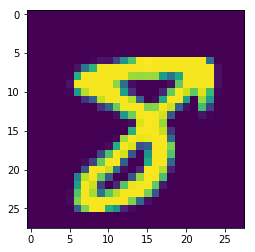

In [131]:
plt.imshow(xsamp.reshape(28,28))

In [107]:
ysamp

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [110]:
sess=tf.InteractiveSession()
init=tf.global_variables_initializer()
sess.run(init)

In [117]:
for epoch in range(training_epochs):
    avg_cost=0.0
    total_batch=int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        _, c=sess.run([optimizer, cost], feed_dict={x:batch_x,y:batch_y})
        avg_cost+=c/total_batch
    print("Epoch: {} cost {:.4f}".format(epoch+1, avg_cost))
print ("model has completed {} Epochs of training".format(training_epochs))

Epoch: 1 cost175.3656
Epoch: 2 cost41.2051
Epoch: 3 cost25.7797
Epoch: 4 cost17.8572
Epoch: 5 cost12.9885
Epoch: 6 cost9.7634
Epoch: 7 cost7.1978
Epoch: 8 cost5.5279
Epoch: 9 cost4.0764
Epoch: 10 cost3.0458
Epoch: 11 cost2.3103
Epoch: 12 cost1.8497
Epoch: 13 cost1.3332
Epoch: 14 cost0.9742
Epoch: 15 cost0.8753
model has copmp[leted 15 Epochs of training


In [119]:
correct_predictions=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [120]:
correct_predictions=tf.cast(correct_predictions,'float')

In [121]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=float32)


In [122]:
accuracy=tf.reduce_mean(correct_predictions)

In [123]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [125]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [126]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [134]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.94870001

In [133]:
95% accuracy

<tf.Tensor 'mod:0' shape=() dtype=float32>